##  Data Science Project - Fetal health

In this project, I will analyse and manipulate a dataset available on Kaggle [at this link](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification).<br>
Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.<br>
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.<br>

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.<br>

In contrary to notion of child mortality is of course maternal mortality, which accounts for 300k deaths during and following pregnancy and childbirth (as of 2018). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.<br>
This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:<br>
*  Normal<br>
*  Suspect<br>
*  Pathological<br>
This ML project is to classify fetal health in order to prevent child and maternal mortality.

<a id="1"> </a>
### 1.Import and introductory study of data

<a id="2"> </a>
#### 1.1. Data import and control

In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#setting the style of graphs
sns.set(style="darkgrid")

#I always prefer to see all columns
pd.set_option("display.max_columns", None)

In [2]:
#loading the dataset
df = pd.read_csv("C:/Users/Alish/Documents/summer internship/ML/fetal_health.csv")
df.head() #take a look at the first 5 lines to get familiar with the dataset

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
print("Shape: {} \n".format(df.shape)) #check the number of rows and columns
df.info() #check features type and missing values

Shape: (2126, 22) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_shor

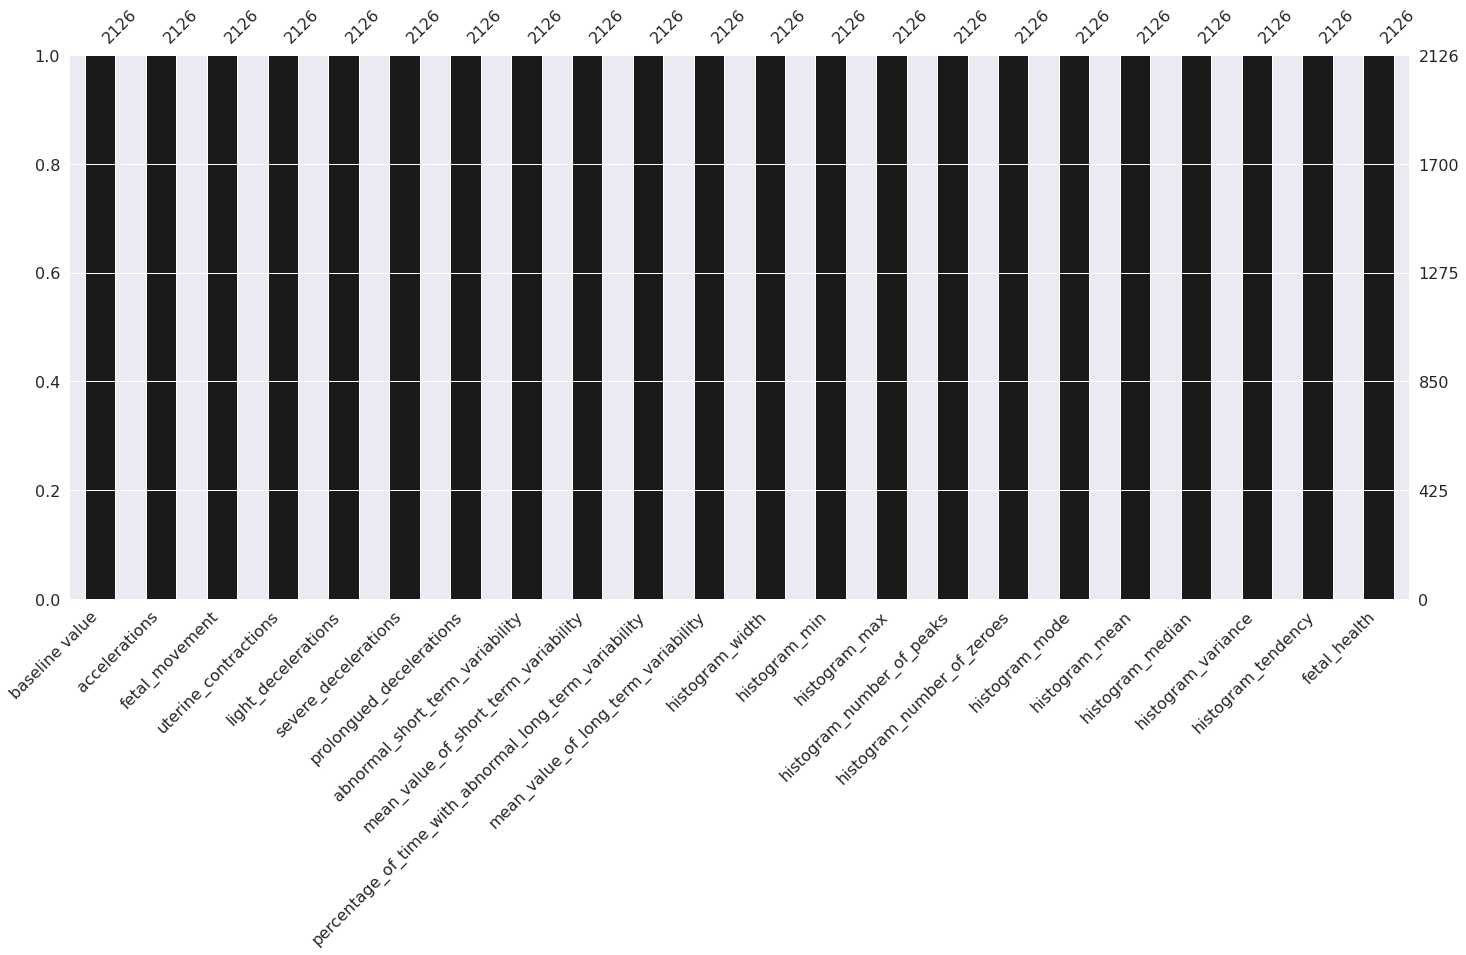

In [4]:
# I've already seen that there are no missing values but I'll do a further check
# df.isnull().sum().any()
msno.bar(df, color=" 0.1")
plt.show()

<a id="3"> </a>
#### 1.2. Explanation of features

* baseline value - continuos numeric ( it contains values from 106 to 160)
* accelerations - continuos numeric                                          
* fetal_movement - continuos numeric                                         
* uterine_contractions - continuos numeric                                  
* light_decelerations - continuos numeric                                    
* severe_decelerations - continuos numeric                                   
* prolongued_decelerations - continuos numeric                               
* abnormal_short_term_variability - continuos numeric                       
* mean_value_of_short_term_variability - continuos numeric                   
* percentage_of_time_with_abnormal_long_term_variability - continuos numeric  
* mean_value_of_long_term_variability - continuos numeric                      
* histogram_width - continuos numeric                                                           
* histogram_min - continuos numeric                                           
* histogram_max - continuos numeric     
* histogram_number_of_peaks - continuos numeric
* histogram_number_of_zeroes - continuos numeric                           
* histogram_mode - continuos numeric                                         
* histogram_mean - continuos numeric                                           
* histogram_median - continuos numeric                                      
* histogram_variance - continuos numeric                                     
* histogram_tendency - continuos numeric                                    
* fetal_health - ordinal categorical value (1- normal 2-suspect 3-Pathological; output target) 

There are no missing values, the type of each feature is consistent with the values it contains.<br>
I have to pay attention to one thing: although all the features are of type "float64", the output variable is actually ordinal categorical as it does not represent real numerical values but only an order relation (it ranges from 1="Normal" to 3="Pathological"). <br>
The other variables are truly numeric (continuos numeric) features.

In [5]:
#dataset description
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


There is a great variation between the numbers, in terms of orders of magnitude: we just need to look at the mean values of the first columns to realize this. We will need to scale the features.<br>
The average value of 'fetal_healt' (the class column) is 1.3, which tells me that on average the values ​​are more in the reference class 1, but, for a better understanding of the distribution of the classes, later we'll make a histogram (this will even help us on checking the balance between the classes).

Considering that the samples are "relatively few" ( 2126 lines), the check on the outliers, and the balancing of the dataset will be made in the complete dataset (without splitting into "train" and "test" set).

<a id="4"> </a>
#### 1.3. Cataloguing of features

In [6]:
#create lists for each type of feature to study their correlations

#continuos numerical features:
num = ["baseline value", "accelerations", "fetal_movement", "uterine_contractions", 
       "light_decelerations","severe_decelerations", "prolongued_decelerations",
       "abnormal_short_term_variability","mean_value_of_short_term_variability", 
       "percentage_of_time_with_abnormal_long_term_variability", "mean_value_of_long_term_variability", 
       "histogram_width", "histogram_min", "histogram_max", "histogram_number_of_peaks","histogram_number_of_zeroes",
       "histogram_mode", "histogram_mean", "histogram_median", "histogram_variance", "histogram_tendency"]

#ordinal categorical features:
cat_ord=[]
for i in df.columns:
    if i not in num and df[i].dtype == "float64":
        cat_ord.append(i)
        
print("Continuos numerical features:\n{} \nTot: {}".format(num,len(num)))
print("Ordinal categorical features:\n{}\nTot: {}".format(cat_ord,len(cat_ord)))

Continuos numerical features:
['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency'] 
Tot: 21
Ordinal categorical features:
['fetal_health']
Tot: 1


<a id="5"> </a>
### 2. Exploratory Data Analysis (EDA)

<a id="6"> </a>
#### 2.1.Analysis of target distribution (fetal_health): balanced or imbalanced dataset?

In [7]:
#I start by drawing a histogram and a boxplot to visualise the distribution of the fetal health
fig = px.histogram(df, x="fetal_health",
                   nbins=3, histnorm=None, category_orders=dict(fetal_health=["1", "2", "3"]),
                   marginal="violin", text_auto=True,)
fig.update_layout(bargap=0.5)
fig.update_xaxes(type="category")
# showing the plot
fig.show()

In [8]:
#printing a table containing some interesting statistics
pd.DataFrame(df["fetal_health"].describe()) 

,fetal_health
count,2126.000000
mean,1.304327
std,0.614377
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


This is a multi-class problem with 3 classes. The dataset, however, is not balanced as class 1 has almost 10 times the number of data in class 3. <br>
The histogram shows us a distribution strongly skewed to the right (mean greater than median).<br>
The violinplot seems to confirm the concentration of the values on class 1.<br>
The statistical table confirms the situation. <br>

I could remove the data relating to class 3, since the samples are 1/10  of those of class 1 but:<br>
- I would have to do the same with class 2, which is numerically comparable to class 1. But, then, there would be only one class left...<br>
- the total of samples is a little too low <br>

So, I keep the data as it is, without balancing.<br>
Furthermore, we have to say that we are studying a dataset related to fetal diseases in which we have three classes that we can call as follows:<br>
class 1: Normal<br>
class 2: Suspect<br>
class 3: Pathological<br>
This means that class 3 is associated with a rare fetal disease and this justifies the classes imbalance

<a id="7"> </a>
#### 2.2. Outliers detection

I use IsolationForest for outliers detection on the whole dataset. <br>
Isolation Forest is a tree-based anomaly detection algorithm.
It is based on modeling the normal data in such a way as to isolate anomalies that are both few in number and different in the feature space.<br>
As we said, Isolation forest works on the principle of the decision tree algorithm. It isolates the outliers by randomly selecting a feature from the given set of features and then randomly selecting a split value between the maximum and minimum values of the selected feature. This random partitioning of features will produce smaller paths in trees for the anomalous data values and distinguish them from the normal set of the data.

In [9]:
#import library
from sklearn.ensemble import IsolationForest

# identifying outliers 
iso = IsolationForest(random_state=0, contamination=0.05)# with contamination I want to fix the percentage of outliers detected
y_outliers = iso.fit_predict(df)

In [10]:
#Find score and anomaly value
df['scores']=iso.decision_function(df)
df['anomaly_Value']= y_outliers
df.head(10) #After adding the scores and anomalies for all the rows in the complete dataset, it will print the predicted anomalies.

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,scores,anomaly_Value
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0,0.038762,1
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0,0.107917,1
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0,0.093168,1
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0,0.087703,1
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0,0.093429,1
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,0.0,150.0,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0,-0.116739,-1
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,0.0,150.0,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0,-0.122138,-1
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,15.6,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0,-0.000791,-1
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,13.6,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0,0.007918,1
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,10.6,68.0,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0,0.013289,1


To show the predicted anomalies outliers present in the dataset , data need to be analyzed after the addition of scores and anomaly columns. Note that the anomaly column values would be -1 and the corresponding scores will be negative.

In [11]:
df[df["anomaly_Value"]== -1] # tables with the predicted outliers

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,scores,anomaly_Value
5,134.0,0.001,0.000,0.010,0.009,0.0,0.002,26.0,5.9,0.0,0.0,150.0,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0,-0.116739,-1
6,134.0,0.001,0.000,0.013,0.008,0.0,0.003,29.0,6.3,0.0,0.0,150.0,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0,-0.122138,-1
7,122.0,0.000,0.000,0.000,0.000,0.0,0.000,83.0,0.5,6.0,15.6,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0,-0.000791,-1
20,129.0,0.000,0.340,0.004,0.002,0.0,0.003,30.0,2.1,0.0,8.5,128.0,54.0,182.0,13.0,0.0,129.0,104.0,120.0,138.0,0.0,3.0,-0.052709,-1
22,128.0,0.000,0.334,0.003,0.003,0.0,0.003,34.0,2.5,0.0,4.0,145.0,54.0,199.0,11.0,1.0,75.0,99.0,102.0,148.0,-1.0,3.0,-0.110708,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029,129.0,0.000,0.001,0.007,0.007,0.0,0.002,65.0,3.1,0.0,0.0,180.0,50.0,230.0,10.0,1.0,105.0,83.0,112.0,14.0,-1.0,3.0,-0.067244,-1
2030,129.0,0.000,0.001,0.006,0.006,0.0,0.003,66.0,2.9,0.0,0.0,94.0,50.0,144.0,8.0,0.0,105.0,85.0,109.0,11.0,0.0,3.0,-0.003580,-1
2034,129.0,0.000,0.001,0.006,0.005,0.0,0.002,67.0,3.3,0.0,0.0,129.0,63.0,192.0,7.0,0.0,105.0,80.0,107.0,14.0,-1.0,3.0,-0.019599,-1
2035,128.0,0.000,0.001,0.008,0.005,0.0,0.002,66.0,2.9,0.0,0.0,129.0,63.0,192.0,6.0,1.0,103.0,84.0,110.0,20.0,-1.0,3.0,-0.009807,-1


In [12]:
#Total percentage of outliers detected
df=pd.DataFrame(df)
print("Percentage of anomalies(outliers) in the dataset: {:.2f}".format((len(df.loc[df["anomaly_Value"]== -1])/len(df))*100))

Percentage of anomalies(outliers) in the dataset: 5.03


In [13]:
#droping outliers rows
for i in range(len(y_outliers)):
    if y_outliers[i] == -1:
        df.drop(i,inplace = True)

#checking new shape
df.shape

(2019, 24)

The number of rows has decreased because I've dropped the rows with the outliers

<a id="8"> </a>
#### 2.3. Study of distributions and correlations between features

I'm calculating the correlation matrix. The scores are calculated using the Pearson correlation index, which determines the covariance between variables. Scores closer to 1 will indicate a strong positive correlation, i.e. as the value of one feature increases, so will the value of the other feature. Conversely, scores close to -1 will indicate a negative correlation (as the value of one feature increases, the value of the other feature decreases). Scores close to 0 indicate no correlation.

In [14]:
df.drop(columns=["scores","anomaly_Value"], inplace=True)#erase two useless columns
#create a table with the correlation values
#the 'corr()' method uses Pearson's coefficient by default to study the covariance between features
fig = px.imshow(round(df.corr(),2), text_auto=True, title="Correlations between features",
                labels=dict(color="Correlation"), color_continuous_scale=px.colors.sequential.RdBu_r, 
                color_continuous_midpoint=0)
fig.update_layout(autosize=False, width=1000, height=1000)
fig.show()

Remember this is a (multi-class) classification problem, from the matrix instead of looking at  the correlation between the features and the label(s) we have to look at the correlation between the features; in fact, there are featues that are highly correlated, for example:<br>

baseline_value e histogram_mode<br>
baseline_value e histogram_median<br>
histogram_mode _mean e _median sono tutte altamente correlate tra di loro <br>
histogram_width e _min <br>
Highly correlated features are highly linearly dependent, which means that they have the same effect on the labels; so, I can decide to eliminate some of them to simplify the analysis.<br>

I make a plot do understand the distributions:

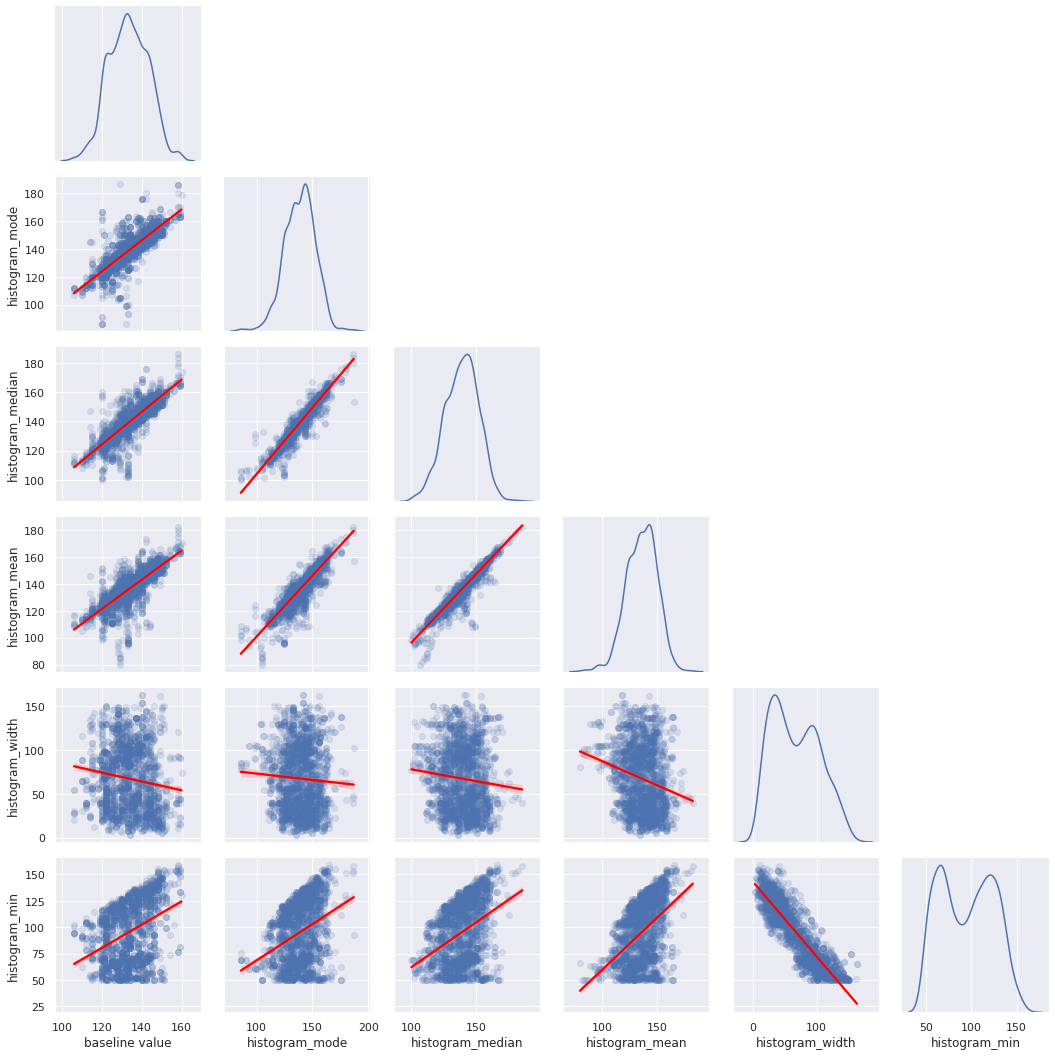

In [15]:
#creating a subtdataframe
subdf = df[['baseline value', 'histogram_mode', 'histogram_median', 'histogram_mean', 'histogram_width', 'histogram_min']]

#creating a unique plot with the regressions
g = sns.PairGrid(subdf,diag_sharey=False, corner=True)
g.map_offdiag(sns.regplot, scatter_kws={'alpha':0.15}, line_kws={'color': 'red'})
g.map_diag(sns.kdeplot)
plt.show()

As expected, the features indicated above are really highly correlated, as can be seen from the graphs; so, I can choose to delete some of them. For example, by crossing the various graphs, I choose to eliminate the following feature:<br>
histogram_min <br>
histogram_mean <br>
(eliminating more features would result in the loss of some data, because they are all crossed with each other)

In [16]:
#droping the columns specified above
df.drop(['histogram_mean', 'histogram_min'], axis=1, inplace=True)

#showing new shape
df.shape

(2019, 20)

<a id="9"> </a>
#### 2.4. Preprocessing: Scaling and Features selection

Feature selection can not be done on the entire dataset (here an interesting discussion on this topic: https://stackoverflow.com/questions/56308116/should-feature-selection-be-done-before-train-test-split-or-after), so I divide the dataset in "train" and "test" set and perform the features selection with the mutual information method and with anova f-test, then I compare the results.

Defining X (features) and y (label):

In [17]:
#features
# X = df.iloc[:,:-1]
X = df.drop("fetal_health", axis=1)

#label
# y = df.iloc[:,-1]
y = df.loc[:, "fetal_health"]

Scaling the features:

In [18]:
#loading all the sklearn modules I need

#data preparation:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split

import warnings
warnings.filterwarnings("ignore")




#splitting
seed = 172 #defining seed
X_train, X_test, y_train, y_test = split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state= seed)
print(X_train.shape)
print(y_train.shape)

#normalizing features
scaler = StandardScaler() #calling the scaler 
#fitting the features to scale them
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


(1615, 19)
(1615,)


Now I can perform the features selection.
I start with the Mutual information method

In [19]:
#loading all the sklearn modules I need
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

#mutual information selecting all features
mutual = SelectKBest(score_func=mutual_info_classif, k='all')

#learn relationship from training data
mutual.fit(X_train, y_train)

# transform train input data
X_train_mut = mutual.transform(X_train)

# transform test input data
X_test_mut = mutual.transform(X_test)

#printing scores of the features
for i in range(len(mutual.scores_)):
    print('Feature %d: %f' % (i, mutual.scores_[i]))

Feature 0: 0.127540
Feature 1: 0.128700
Feature 2: 0.037850
Feature 3: 0.065285
Feature 4: 0.045660
Feature 5: 0.003322
Feature 6: 0.041387
Feature 7: 0.170579
Feature 8: 0.227126
Feature 9: 0.213404
Feature 10: 0.064309
Feature 11: 0.124053
Feature 12: 0.059659
Feature 13: 0.030967
Feature 14: 0.015917
Feature 15: 0.093515
Feature 16: 0.100625
Feature 17: 0.133210
Feature 18: 0.004723


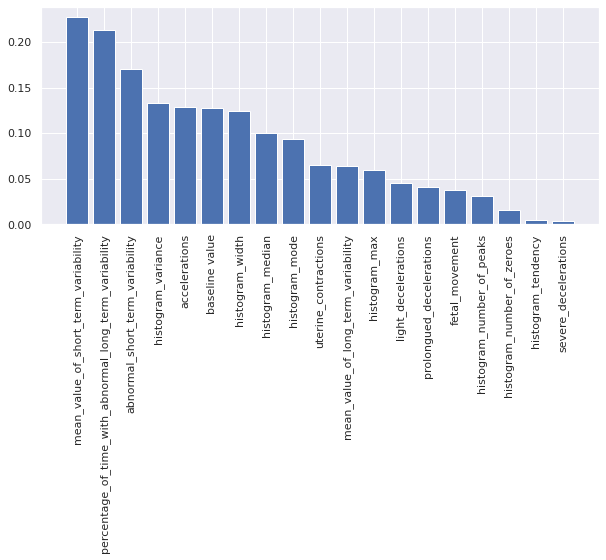

In [20]:
# I create a df with the test scores
mutual_score = pd.DataFrame(mutual.scores_, index=df.drop(columns=["fetal_health"]).columns, columns=["Mutual_Score"])
mutual_score = mutual_score.sort_values(by="Mutual_Score", ascending=False)

# I visualise with a bar graph which features are most influential
sns.set()
plt.figure(figsize=(10, 4))
plt.bar(x=mutual_score.index, height=mutual_score["Mutual_Score"])
plt.xticks(rotation=90)
plt.show()


Now I try ANOVA f-test

In [21]:
# configure to select all features
an = SelectKBest(score_func=f_classif, k='all')

# learn relationship from training data
an.fit(X_train, y_train)

# transform train input data
X_train_an = an.transform(X_train)

# transform test input data
X_test_an = an.transform(X_test)

#printing scores of the features
for i in range(len(an.scores_)):
    print('Feature %d: %f' % (i, mutual.scores_[i]))

Feature 0: 0.127540
Feature 1: 0.128700
Feature 2: 0.037850
Feature 3: 0.065285
Feature 4: 0.045660
Feature 5: 0.003322
Feature 6: 0.041387
Feature 7: 0.170579
Feature 8: 0.227126
Feature 9: 0.213404
Feature 10: 0.064309
Feature 11: 0.124053
Feature 12: 0.059659
Feature 13: 0.030967
Feature 14: 0.015917
Feature 15: 0.093515
Feature 16: 0.100625
Feature 17: 0.133210
Feature 18: 0.004723


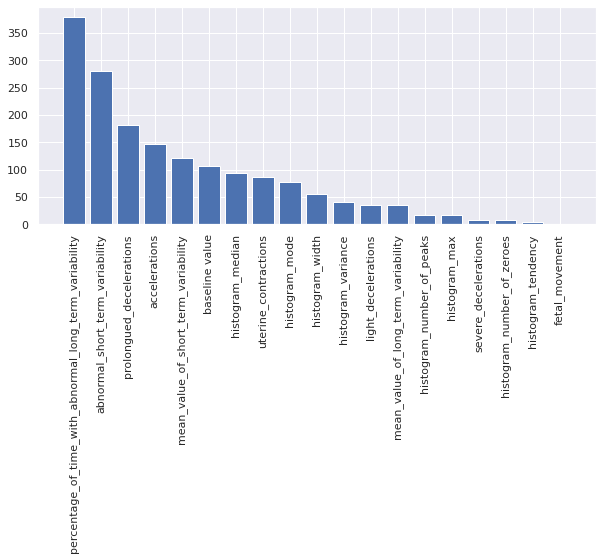

In [22]:
# I create a df with the test scores
an_score = pd.DataFrame(an.scores_, index=df.drop(columns=["fetal_health"]).columns, columns=["Anova_Score"])
an_score = an_score.sort_values(by="Anova_Score", ascending=False)

# I visualise with a bar graph which features are most influential
sns.set()
plt.figure(figsize=(10, 4))
plt.bar(x=an_score.index, height=an_score["Anova_Score"])
plt.xticks(rotation=90)
plt.show()

The results obtained in terms of the importance of the features are quite different between the two methods for a very simple reason: Anova f-test is able to 'feel' the linear dependence between the features, while the mutual information 'feels' any type of dependence, in particular it 'feels' the non-linear ones.<br>
Considering the results obtained with the correlation matrix and the consequent elimination of two features following the graphs with linear regression, then, coherently, the mutual information indicates better than Anova f-test which are the features that really matter for this type of problem (ref.: https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html)

<a id="10"> </a>
#### 2.5. Choose of proper metric

Accuracy will not give me the confidence that I have developed a good model (and this is true in general: accuracy alone is not enough), so I have to find other metrics to evaluate it.<br>
Other metrics I'm going to use will be:<br>
the classification report<br>
the confusion matrix<br>
the Kernel Density Estimation (KDE) curves to see how the models approximate the probability density of the predicted values, compared to the real ones on the test set<br>

<a id="11"> </a>
### 3. Machine Learning: creation of the predictive model

I now try two different ways. The road I call 1 consists of using all available features, while the road I call 2 consists of selecting the features (3 or 4) that proved to be most relevant according to the Mutual Information or ANOVA f-test 

<a id="12"> </a>
#### 3.1. Method 1: spot check using all features for  the predictions

I perform a spot check with StratifiedKFold which is used in cases with unbalanced classes, as in this case. The models to be spotted will be: Logistic Regression, Random Forest, KNN.
I decide to use only one evaluation metric at this stage; for simplicity, I choose accuracy. I will then use the other metrics chosen before for evaluating the performance of the models.

#### Logistic regression

In [23]:
#StratifiedKfold crossvalidation
from sklearn.model_selection import StratifiedKFold #stratification by fetal health
crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

#logistic regression model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression # import model
model_lr = LogisticRegression(max_iter=150, random_state=seed)

#results
results = model_selection.cross_val_score(model_lr, X_train, y_train, cv=crossval, scoring='accuracy')

#printing results
print('Accuracy: {}'.format(round(results.mean(),2)))

Accuracy: 0.9


#### Random Forest Classifier

In [24]:
#random forest model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=seed)

#results
results = model_selection.cross_val_score(model_rf, X_train, y_train, cv=crossval, scoring='accuracy')

#printing results mean value
print('Accuracy: {}'.format(round(results.mean(),2)))

Accuracy: 0.94


#### K-nearest neighbour KNN

For Knn, I do a 'pre-validation' to choose k, but I do it on the train set:

In [25]:
from sklearn.neighbors import KNeighborsClassifier # import model

from sklearn.metrics import accuracy_score #import accuracy

#k pre-validation 
for k in [3,5,7,9]:
    model_knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_train_pred = model_knn.predict(X_train)
    validation_accuracy = accuracy_score(y_train, y_train_pred)
    print('Validation accuracy with k {}: {:.2f}'.format(k, validation_accuracy)) 

Validation accuracy with k 3: 0.95
Validation accuracy with k 5: 0.94
Validation accuracy with k 7: 0.92
Validation accuracy with k 9: 0.92


Generally speaking, it is a good idea to choose an odd k value.
I choose k=3 to continue with the crossvalidation:

In [26]:
#knn model
model_knn = KNeighborsClassifier(n_neighbors=3)

#results
results = model_selection.cross_val_score(model_knn, X_train, y_train, cv=crossval, scoring='accuracy')

#printing results mean value
print('Accuracy: {}'.format(round(results.mean(),2)))

Accuracy: 0.91


Despite a good result I decide to not use KNN in the next phases of the hyperparameter tuning study because it's a more simple model with a pre-validation already done

<a id="13"> </a>
#### 3.1.1. Hyperparameters tuning

#### Logisitc regression

In [27]:
#first training a Logistic regression
model_lr = LogisticRegression(max_iter=150, random_state=seed)

#preparing parameter values to be validated
lr_params = [
             {"solver": ['newton-cg'],"C":[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],"penalty":['l2', 'none']},
             {"solver": ['lbfgs'],"C":[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],"penalty":['l2', 'none'] },
             {"solver": ['liblinear'],"C":[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],"penalty":['l1', 'l2']}
             ]

from sklearn.model_selection import GridSearchCV #for validating hyperparameters                
#start the search
model_lr = GridSearchCV(estimator= model_lr, param_grid=lr_params, cv=crossval, scoring='accuracy', verbose=1 , n_jobs=-1)

#training the model with the hyperparameters found
model_lr.fit(X_train, y_train)
#printing
print("Best score: {}, and best hyperparameters: {}".format(model_lr.best_score_, model_lr.best_params_ ))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

Best score: 0.8978328173374612, and best hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


I evaluate the performance of Logistic Regression with the best hyperparameters found above:

In [28]:
#predictions and model accuracy
y_test_pred = model_lr.best_estimator_.predict(X_test)
y_train_pred = model_lr.best_estimator_.predict(X_train)

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#accuracy
print('Model accuracy on test set: {}'.format(round(accuracy_score(y_test, y_test_pred),2)))
print('Model accuracy on training set: {}'.format(round(accuracy_score(y_train, y_train_pred),2)))

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print('Model precision on test set: {}'.format(round(prec,2)))

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print('Model recall on test set: {}'.format(round(rec,2)))

Model accuracy on test set: 0.88
Model accuracy on training set: 0.9
Model precision on test set: 0.87
Model recall on test set: 0.88


Now I take a look at the classification report

In [29]:
from sklearn.metrics import classification_report
target_names = ['Normal', 'Suspect', 'Pathological']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.92      0.97      0.94       325
     Suspect       0.64      0.53      0.58        57
Pathological       0.75      0.41      0.53        22

    accuracy                           0.88       404
   macro avg       0.77      0.64      0.68       404
weighted avg       0.87      0.88      0.87       404



The first class (Normal) has great results that are bigger than the other classes. Now I take a look at the confusion matrix

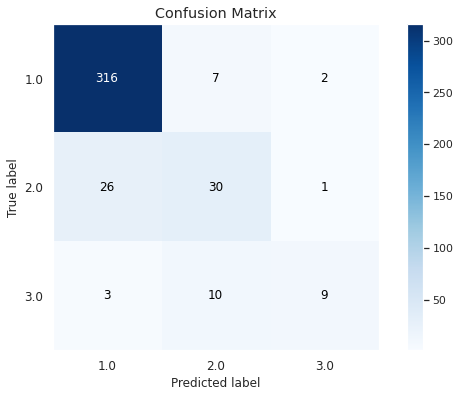

In [30]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred, normalize=False, figsize=(10,6))
plt.show()

As we can see, the true positives and true negatives (the values on the diagonal) are well predicted, since the values on the diagonal are much higher than the others. The 26 value is a little to high

It's the moment of KDE graph:

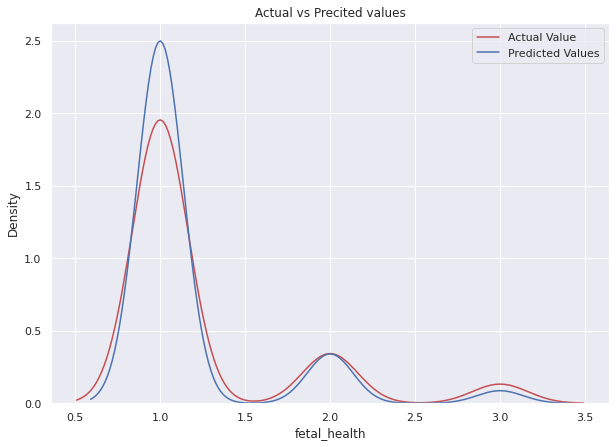

In [31]:
#figure size
plt.figure(figsize=(10, 7))

#Kernel Density Estimation plot
ax = sns.kdeplot(y_test, color="r", label="Actual Value") #actual values
sns.kdeplot(y_test_pred, color="b", label="Predicted Values", ax=ax) #predicted values

#showing title
plt.title('Actual vs Precited values')
#showing legend
plt.legend()
#showing plot
plt.show()

As we can see, class 2 is predicted well; class 3 is slightly underestimated, class 1 is overestimated

In [32]:
#creating list with the resuls of the model
tab = []
    
tab.append([model_lr.estimator,accuracy_score(y_train, y_train_pred), precision_score(y_train, y_train_pred, average='weighted'), recall_score(y_train, y_train_pred, average='weighted'), " --- ",
                                               accuracy_score(y_test, y_test_pred), precision_score(y_test, y_test_pred, average='weighted'), recall_score(y_test, y_test_pred, average='weighted')])

#### Random Forest Classifier

In [33]:
#first training a Random Forest Classifier
model_rf = RandomForestClassifier(random_state=seed)

#preparing parameter values to be validated
rf_params = [{"n_estimators": [10, 100, 1000],"max_features":['sqrt', 'log2'], "criterion":['gini', 'entropy']}]
                
#start the search
model_rf = GridSearchCV(estimator= model_rf, param_grid=rf_params, cv=crossval, scoring='accuracy', verbose=1 , n_jobs=-1)

#training the model with the hyperparameters found
model_rf.fit(X_train, y_train)
#printing
print("Best score: {}, and best hyperparameters: {}".format(model_rf.best_score_, model_rf.best_params_ ))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best score: 0.9430340557275543, and best hyperparameters: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 1000}


I evaluate the performance of Random Forest with the best hyperparameters found above:

In [34]:
#predictions and model accuracy
y_test_pred = model_rf.best_estimator_.predict(X_test)
y_train_pred = model_rf.best_estimator_.predict(X_train)


#accuracy
print('Model accuracy on test set: {}'.format(round(accuracy_score(y_test, y_test_pred),2)))
print('Model accuracy on training set: {}'.format(round(accuracy_score(y_train, y_train_pred),2)))

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print('Model precision on test set: {}'.format(round(prec,2)))

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print('Model recall on test set: {}'.format(round(rec,2)))

Model accuracy on test set: 0.94
Model accuracy on training set: 1.0
Model precision on test set: 0.94
Model recall on test set: 0.94


Now I take a look at the classification report

In [35]:
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.95      0.99      0.97       325
     Suspect       0.91      0.72      0.80        57
Pathological       0.95      0.86      0.90        22

    accuracy                           0.94       404
   macro avg       0.94      0.86      0.89       404
weighted avg       0.94      0.94      0.94       404



Also in this case, the first class (Normal) has the greatest results but now the results of the other classes are increased. Now I take a look at the confusion matrix

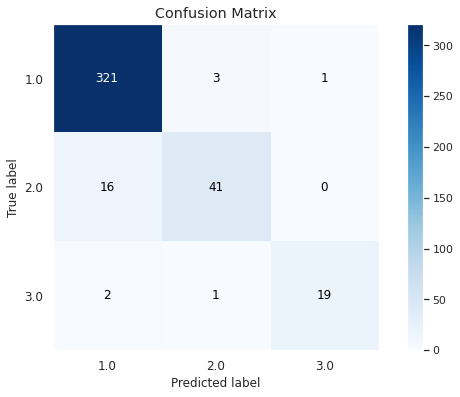

In [36]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred, normalize=False, figsize=(10,6))
plt.show()

Even here the diagonal values shows that the values are well predicted. Only the 16 value is big just a bit. Now I take a look at KDE graph:

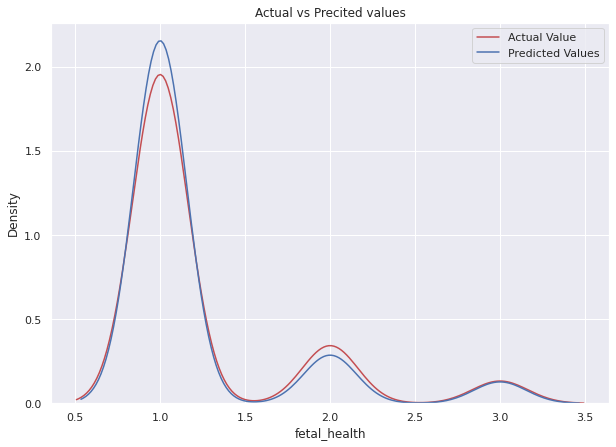

In [37]:
#figure size
plt.figure(figsize=(10, 7))

#Kernel Density Estimation plot
ax = sns.kdeplot(y_test, color="r", label="Actual Value") #actual values
sns.kdeplot(y_test_pred, color="b", label="Predicted Values", ax=ax) #predicted values

#showing title
plt.title('Actual vs Precited values')
#showing legend
plt.legend()
#showing plot
plt.show()

Here it is interesting to note how, despite the numerical results of the RF metrics (precision, recall and accuracy) are higher, on average, than those of LR, KDE graphically shows us different results between real and predicted values, which leads me to underline how much it is important to think about this graph for the choice of the final model. In this case the class 3 is very well predicted, class 2 is slightly underestimated, class 1 is overestimated but the difference with the real value is lower than LR model

In [38]:
#creating list with the resuls of the second model
tab.append([model_rf.estimator,accuracy_score(y_train, y_train_pred), precision_score(y_train, y_train_pred, average='weighted'), recall_score(y_train, y_train_pred, average='weighted'), " --- ",
                                               accuracy_score(y_test, y_test_pred), precision_score(y_test, y_test_pred, average='weighted'), recall_score(y_test, y_test_pred, average='weighted')])

#creating dataframe in order to compare the models    
models_table = pd.DataFrame(tab, columns=["model", "accuracy_train", "precision_train", "recall_train", 
                                   " --- ", "accuracy_test", "precision_test", "recall_test"])
models_table

,model,accuracy_train,precision_train,recall_train,---,accuracy_test,precision_test,recall_test
0,"LogisticRegression(max_iter=150, random_state=...",0.903406,0.897599,0.903406,---,0.878713,0.867733,0.878713
1,RandomForestClassifier(random_state=172),0.998762,0.998762,0.998762,---,0.943069,0.942022,0.943069


We can notice that:

* both model overfitted a little bit (test results are lower than train results) but still scored well.
* RF makes better results than LR
* LR, despites worst global performances, fitted better than RF ( test results are closer to train results)

<a id="14"> </a>
#### 3.2. Method 2: spot check using the most relevant features for  the predictions

As previously indicated, I refer to the results obtained with the mutual information to understand which are the most important features. From the graph above, I choose the first 3 features of the graph itself:<br>
Feature 9 --> mean_value_of_short_term_variability<br>
Feature 10 --> percentage_of_time_with_abnormal_long_term_variability<br>
Feature 8 --> abnormal_short_term_variability<br>
I create a sub-dataframe with just these features and analyze it:

In [39]:
#fetal 'reducted'
fetal_red = df[[ 'abnormal_short_term_variability','mean_value_of_short_term_variability', 
                 'percentage_of_time_with_abnormal_long_term_variability', 'fetal_health']]

#showing head
fetal_red.head()

,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,fetal_health
0,73.0,0.5,43.0,2.0
1,17.0,2.1,0.0,1.0
2,16.0,2.1,0.0,1.0
3,16.0,2.4,0.0,1.0
4,16.0,2.4,0.0,1.0


I have to redefine X and y and split the dataset:

In [40]:
#features
X = fetal_red.drop("fetal_health", axis=1)

#label
y = fetal_red.loc[:, "fetal_health"]


#splitting
seed = 172 #defining seed
X_train, X_test, y_train, y_test = split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state= seed)

#normalizing features
scaler = StandardScaler() #calling the scaler 
#fitting the features to scale them
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

I do the spot check of the 3 models to select the best 2, as done before.

#### Logistic regression

In [41]:
#StratifiedKfold crossvalidation
crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

#logistic regression model
model_lr = LogisticRegression(max_iter=150, random_state=seed)

#results
results = model_selection.cross_val_score(model_lr, X_train, y_train, cv=crossval, scoring='accuracy')

#printing results
print('Accuracy: {}'.format(round(results.mean(),2)))

Accuracy: 0.86


#### Random Forest Classifier

In [42]:
#random forest model
model_rf = RandomForestClassifier(random_state=seed)

#results
results = model_selection.cross_val_score(model_rf, X_train, y_train, cv=crossval, scoring='accuracy')

#printing results mean value
print('Accuracy: {}'.format(round(results.mean(),2)))

Accuracy: 0.91


#### K-nearest neighbour

As before, I perform a 'prevalidation' for k:

In [43]:
#k pre-validation 
for k in [3,5,7,9]:
    model_knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_train_pred = model_knn.predict(X_train)
    validation_accuracy = accuracy_score(y_train, y_train_pred)
    print('Validation accuracy with k {}: {:.2f}'.format(k, validation_accuracy)) 

Validation accuracy with k 3: 0.94
Validation accuracy with k 5: 0.92
Validation accuracy with k 7: 0.91
Validation accuracy with k 9: 0.91


In this case I decide to continue with k=3

In [44]:
##knn model
model_knn = KNeighborsClassifier(n_neighbors=3)

#results
results = model_selection.cross_val_score(model_knn, X_train, y_train, cv=crossval, scoring='accuracy')

#printing results mean value
print('Accuracy: {}'.format(round(results.mean(),2)))

Accuracy: 0.9


All the accuracy are worst than previously but also in this case I decide to continue with LR and RF

<a id="15"> </a>
#### 3.2.1. Hyperparameters tuning

#### Logistic regression

In [45]:
#first training a Logistic regression
model_lr = LogisticRegression(max_iter=150, random_state=seed)

#preparing parameter values to be validated
lr_params = [
             {"solver": ['newton-cg'],"C":[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],"penalty":['l2', 'none']},
             {"solver": ['lbfgs'],"C":[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],"penalty":['l2', 'none'] },
             {"solver": ['liblinear'],"C":[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],"penalty":['l1', 'l2']}
             ]

                
#start the search
model_lr = GridSearchCV(estimator= model_lr, param_grid=lr_params, cv=crossval, scoring='accuracy', verbose=1 , n_jobs=-1)

#training the model with the hyperparameters found
model_lr.fit(X_train, y_train)
#printing
print("Best score: {}, and best hyperparameters: {}".format(model_lr.best_score_, model_lr.best_params_ ))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

Best score: 0.8575851393188854, and best hyperparameters: {'C': 1e-05, 'penalty': 'none', 'solver': 'newton-cg'}


I evaluate the performance of Logistic Regression with the best hyperparameters found above:

In [46]:
#predictions and model accuracy
y_test_pred = model_lr.best_estimator_.predict(X_test)
y_train_pred = model_lr.best_estimator_.predict(X_train)

#accuracy
print('Model accuracy on test set: {}'.format(round(accuracy_score(y_test, y_test_pred),2)))
print('Model accuracy on training set: {}'.format(round(accuracy_score(y_train, y_train_pred),2)))

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print('Model precision on test set: {}'.format(round(prec,2)))

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print('Model recall on test set: {}'.format(round(rec,2)))

Model accuracy on test set: 0.85
Model accuracy on training set: 0.86
Model precision on test set: 0.82
Model recall on test set: 0.85


Now I take a look at the classification report

In [47]:
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.88      0.97      0.92       325
     Suspect       0.61      0.35      0.44        57
Pathological       0.50      0.27      0.35        22

    accuracy                           0.85       404
   macro avg       0.66      0.53      0.57       404
weighted avg       0.82      0.85      0.83       404



By selecting the most important feaures the score of the first class (Normal) is always better than the other classes but now class 2 and 3 get worst results. Now I take a look at the confusion matrix

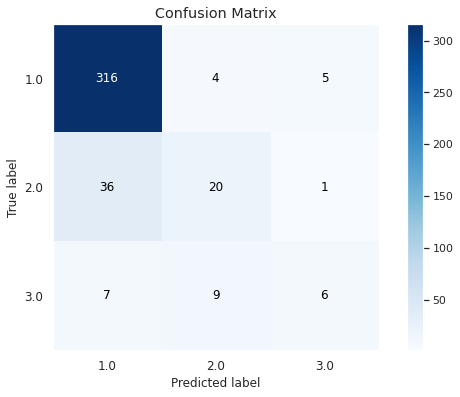

In [48]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred, normalize=False, figsize=(10,6))
plt.show()

Again, the true positives and true negatives (the values on the diagonal) are well predicted, since the values on the diagonal are much higher than the others, but the 36 value is a little too high. It's the moment of KDE graph:

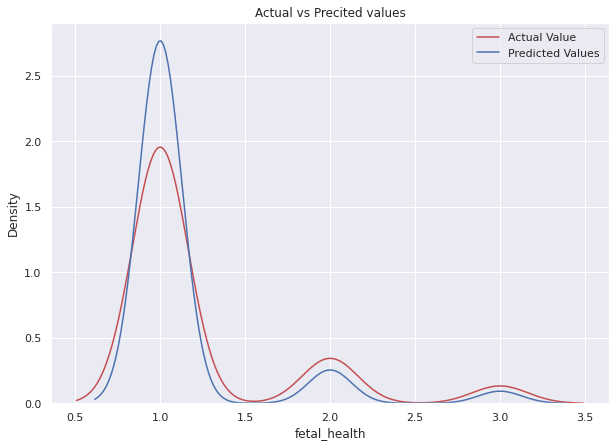

In [49]:
#figure size
plt.figure(figsize=(10, 7))

#Kernel Density Estimation plot
ax = sns.kdeplot(y_test, color="r", label="Actual Value") #actual values
sns.kdeplot(y_test_pred, color="b", label="Predicted Values", ax=ax) #predicted values

#showing title
plt.title('Actual vs Precited values')
#showing legend
plt.legend()
#showing plot
plt.show()

Class 3 and 2 are slightly underestimated; class 1 is overestimated.

In [50]:
#creating list with the resuls of the model
tab2 = []
    
tab2.append([model_lr.estimator,accuracy_score(y_train, y_train_pred), precision_score(y_train, y_train_pred, average='weighted'), recall_score(y_train, y_train_pred, average='weighted'), " --- ",
                                               accuracy_score(y_test, y_test_pred), precision_score(y_test, y_test_pred, average='weighted'), recall_score(y_test, y_test_pred, average='weighted')])

#### Random Forest Classifier

In [51]:
#first training a Random Forest classifier
model_rf = RandomForestClassifier(random_state=seed)

#preparing parameter values to be validated
rf_params = [{"n_estimators": [10, 100, 1000],"max_features":['sqrt', 'log2'], "criterion":['gini', 'entropy']}]
                
#start the search
model_rf = GridSearchCV(estimator= model_rf, param_grid=rf_params, cv=crossval, scoring='accuracy', verbose=1 , n_jobs=-1)

#training the model with the hyperparameters found
model_rf.fit(X_train, y_train)
#printing
print("Best score: {}, and best hyperparameters: {}".format(model_rf.best_score_, model_rf.best_params_ ))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best score: 0.9126934984520123, and best hyperparameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 10}


I evaluate the performance of Random Forest with the best hyperparameters found above:

In [52]:
#predictions and model accuracy
y_test_pred = model_rf.best_estimator_.predict(X_test)
y_train_pred = model_rf.best_estimator_.predict(X_train)


#accuracy
print('Model accuracy on test set: {}'.format(round(accuracy_score(y_test, y_test_pred),2)))
print('Model accuracy on training set: {}'.format(round(accuracy_score(y_train, y_train_pred),2)))

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print('Model precision on test set: {}'.format(round(prec,2)))

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print('Model recall on test set: {}'.format(round(rec,2)))

Model accuracy on test set: 0.91
Model accuracy on training set: 0.98
Model precision on test set: 0.9
Model recall on test set: 0.91


Now I take a look at the classification report

In [53]:
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.92      0.98      0.94       325
     Suspect       0.82      0.58      0.68        57
Pathological       0.89      0.73      0.80        22

    accuracy                           0.91       404
   macro avg       0.88      0.76      0.81       404
weighted avg       0.90      0.91      0.90       404



The score of the first class (Normal) is, again, better than the other classes but the results of third and second classes are increased. Now I take a look at the confusion matrix

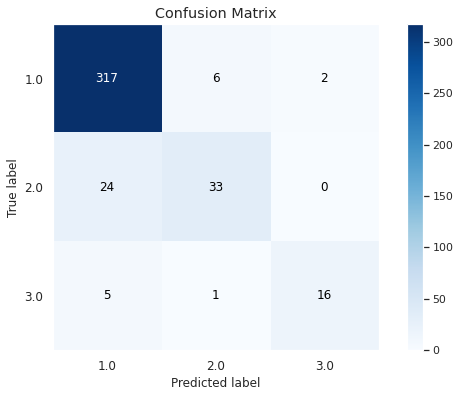

In [54]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred, normalize=False, figsize=(10,6))
plt.show()

Again, the true positives and true negatives (the values on the diagonal) are well predicted, since the values on the diagonal are much higher than the others, but the 24 value is a little too high. It's the moment of KDE graph

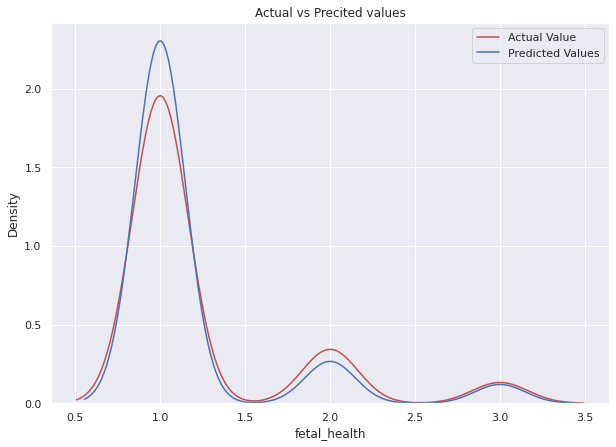

In [55]:
#figure size
plt.figure(figsize=(10, 7))

#Kernel Density Estimation plot
ax = sns.kdeplot(y_test, color="r", label="Actual Value") #actual values
sns.kdeplot(y_test_pred, color="b", label="Predicted Values", ax=ax) #predicted values

#showing title
plt.title('Actual vs Precited values')
#showing legend
plt.legend()
#showing plot
plt.show()

Class 3 is very well predicted; class 1 is overestimated and class 2 is a little underestimated

In [56]:
#creating list with the resuls of the second model
tab2.append([model_rf.estimator,accuracy_score(y_train, y_train_pred), precision_score(y_train, y_train_pred, average='weighted'), recall_score(y_train, y_train_pred, average='weighted'), " --- ",
                                               accuracy_score(y_test, y_test_pred), precision_score(y_test, y_test_pred, average='weighted'), recall_score(y_test, y_test_pred, average='weighted')])

#creating dataframe in order to compare the models    
models_table2 = pd.DataFrame(tab2, columns=["model", "accuracy_train", "precision_train", "recall_train", 
                                   " --- ", "accuracy_test", "precision_test", "recall_test"])
models_table2

,model,accuracy_train,precision_train,recall_train,---,accuracy_test,precision_test,recall_test
0,"LogisticRegression(max_iter=150, random_state=...",0.856966,0.835680,0.856966,---,0.846535,0.820836,0.846535
1,RandomForestClassifier(random_state=172),0.978947,0.978781,0.978947,---,0.905941,0.901833,0.905941


Also in thi case:<br>
- both model overfitted a little bit (test results are lower than train results) but still scored well.<br>
- RF, again, makes better results very similar at the first method (all feaures) while LR seems to be more influenced by the selection of few features making worst results than previously<br>
- LR, again, fitted better than RF ( test results are closer to train results)

<a id="16"> </a>
### 4. Conclusions: Choice of the model

In the end, the performance with the first method( all features) are better than the second method( only few most important features selected) but in both cases the results are satisfying. <br>
Following route 2, I would choose the Random Forest model mainly based on KDE because - I didn't say it before and I say it now - I chose "average = 'weighted'" in the calculation of the metrics (accuracy, precision, recall) because, being a multi-class problem, in this way I obtained numerical values weighted by class (which seemed to me the best choice, since the dataset is unbalanced); therefore, I think the KDE graph is more reliable than the other metrics for the final evaluation, which in any case must be taken into consideration.<br>
Moreover, having a model that predicts the pathological condition very precisely (class 3) would make me start 'to make myself a reason' about a future problem; I also believe that the predicted values for the normal (1) and suspect (2) classes are acceptable (again with respect to KDE), also because if you fall into the suspect class I expect, however, that physically there are exams to be done in followed by confirmation of relapse in class 1 or class 3.